In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("./seeds.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [21]:
df[7].unique()

array([1, 2, 3], dtype=int64)

In [5]:
df.keys()

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [10]:
from pprint import pprint


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

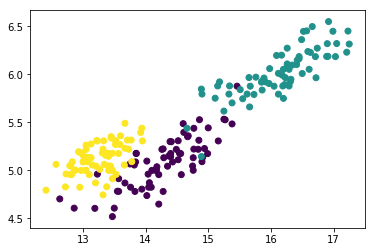

In [36]:
plt.scatter(df[1],df[6],c=df[7])
plt.show()

In [12]:
pprint(df.values)

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])


In [14]:
from sklearn.cluster import KMeans

In [39]:
points=df[:]

In [43]:
model=KMeans(n_clusters=3)
model.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
labels=model.predict(points)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


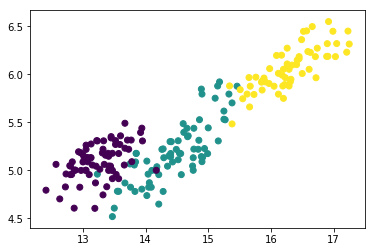

In [45]:
plt.scatter(df[1],df[6],c=labels)
plt.show()

In [68]:
species=df[6][df[7]]

In [69]:
d = pd.DataFrame({'species' : species , 'labels' : labels  })


In [70]:
pd.crosstab(d['species'], d['labels'])

labels,0,1,2
species,,,
4.805,70,0,0
4.825,0,10,60
4.956,5,64,1


In [72]:

n_cluster = np.arange(1,10)

inertias = []
for cluster in n_cluster:
    model = KMeans(n_clusters= cluster)
    model.fit(points)
    inertias.append(model.inertia_)
    
for num, inertia in zip(n_cluster, inertias):
    print(num, inertia)

1 2859.852410177952
2 1147.2480596008331
3 625.7199966009625
4 512.3364264634379
5 429.2136848796425
6 368.59073262604284
7 309.44006345711614
8 275.04067186375585
9 246.72591524838873


In [73]:
model.inertia_

246.72591524838873

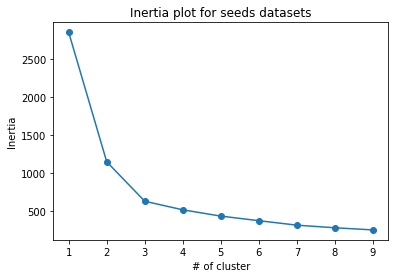

In [74]:

plt.plot(n_cluster, inertias, '-o')
# plt.line(n_cluster,inertias, c='r')
plt.xlabel('# of cluster')
plt.ylabel('Inertia')
plt.title('Inertia plot for seeds datasets')
plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
point = scale.fit_transform(points)

In [76]:
print(point)

[[ 1.42097769e-01  2.15462437e-01  6.06017918e-05 ... -9.86151745e-01
  -3.83577423e-01 -1.22474487e+00]
 [ 1.11880257e-02  8.22375713e-03  4.28515270e-01 ... -1.78816620e+00
  -9.22013487e-01 -1.22474487e+00]
 [-1.92066576e-01 -3.60200562e-01  1.44238325e+00 ... -6.67479334e-01
  -1.18919199e+00 -1.22474487e+00]
 ...
 [-5.67570840e-01 -6.90247348e-01  7.33948301e-01 ...  3.07658816e+00
  -7.18060432e-01  1.22474487e+00]
 [-1.03608992e+00 -1.03564515e+00 -8.01701104e-01 ... -6.81351965e-02
  -7.42534799e-01  1.22474487e+00]
 [-8.77620233e-01 -9.35863561e-01 -1.10234659e-01 ...  1.29122264e+00
  -7.03783718e-01  1.22474487e+00]]


In [79]:
model2 = KMeans(n_clusters = 3)
model2.fit(point)
labels2 = model2.predict(point)

df2 = pd.DataFrame({'species' : species, 'labels':labels})

pprint(pd.crosstab(df2['species'], df2['labels']))

labels    0   1   2
species            
4.805    70   0   0
4.825     0  10  60
4.956     5  64   1
